# Тема 5,6

In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sympy as sp

### Вариант 4
Построение сплайна через наклоны \
I тип кр усл. \
Задача дифференцирования (вторая производная), \
данные из лаб. раб. 1

In [2]:
# метод прогонки
def solving(
    matrix: np.ndarray,
    d_array: np.ndarray,
):
    n = matrix.shape[0]
    t_x_i_save = [None for _ in range(n)]
    result = [None for _ in range(n)]
    """
    первый этап: выражаем в первом уравнении x_1 через x_2
    b_1 x_1 + c_1 x_2 = d_1
    x_1 = d_1 / b_1 - c_1 x_2 / b_1
    x_i = d_1 / b_1 - c_1 x_ip1 / b_1
    для следующего - x_im1 = d_1 / b_1 - c_1 x_i / b_1
    """
    b_1, c_1, d_1 = matrix[0, 0], matrix[0, 1], d_array[0]
    t_x_i = (d_1/b_1, -c_1/b_1)  # (y, z)
    t_x_i_save[1] = t_x_i

    """
    второй этап: итерируемся и на каждой итерации выражаем x_i через x_ip1
    a_i x_im1 + b_i x_i + c_i x_ip1 = d_i
    a_i t(x_i) + b_i x_i + c_i x_ip1 = d_i
    a_i t(x_i) + b_i x_i = y + z x_i  (z - коэф)
    y + z x_i + c_i x_ip1 = d_i
    x_i = (d_i - y) / z - c_i x_ip1 / z
    для следующего - x_im1 = (d_i - y) / z - c_i x_i / z
    """
    for i in range(1, n-1):
        a_i, b_i, c_i, d_i = matrix[i,i-1], matrix[i,i], matrix[i,i+1], d_array[i]
        y, z = t_x_i
        y, z = (a_i * y, a_i * z + b_i)
        t_x_i = ((d_i-y)/z, -c_i/z)
        t_x_i_save[i+1] = t_x_i

    """
    третий этап: получаем x_n
    a_n x_nm1 + b_n x_n = d_n
    a_n t(x_n) + b_n x_n = d_n
    a_n t(x_n) + b_n x_n = y + z x_n  (z - коэф)
    y + z x_n = d_n
    x_n = (d_n - y) / z
    """
    y, z = t_x_i
    a_n, b_n, d_n = matrix[n-1,n-2], matrix[n-1,n-1], d_array[n-1]
    y, z = (a_n * y, a_n * z + b_n)
    x_n = (d_n - y) / z
    result[n-1] = x_n

    """
    четвёртый этап: получаем вектор x
    """
    for i in range(n-2, 0, -1):
        a_i, b_i, c_i, d_i = matrix[i,i-1], matrix[i,i], matrix[i,i+1], d_array[i]
        y, z = t_x_i_save[i]
        x_ip1_known = result[i+1]
        result[i] = (d_i - c_i*x_ip1_known - a_i*y) / (a_i*z + b_i)
    
    b_1, c_1, d_1 = matrix[0,0], matrix[0,1], d_array[0]
    x_2_known = result[1]
    result[0] = (d_1 - c_i*x_2_known) / b_1

    return result


In [3]:
x_sym = sp.Symbol('x')
f_sym = (x_sym-1)**2 - 0.5 * sp.exp(x_sym)
f_prime_sym = sp.diff(f_sym, x_sym)
f_double_prime_sym = sp.diff(f_prime_sym, x_sym)

f = sp.lambdify(x_sym, f_sym, 'numpy')
f_prime = sp.lambdify(x_sym, f_prime_sym, 'numpy')
f_double_prime = sp.lambdify(x_sym, f_double_prime_sym, 'numpy')

In [4]:
A, B = 0.1, 0.6
N_segments = 10  # 11 точек = 10 отрезков
N_points = N_segments + 1
x_nodes = np.linspace(A, B, N_points)
y_nodes = f(x_nodes)

h = np.diff(x_nodes)
x_nodes, h

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]))

In [5]:
print("Узлы интерполяции:")
for i, (x, y) in enumerate(zip(x_nodes, y_nodes)):
    print(f"x_{i} = {x:.3f}, y_{i} = {y:.3f}")

Узлы интерполяции:
x_0 = 0.100, y_0 = 0.257
x_1 = 0.150, y_1 = 0.142
x_2 = 0.200, y_2 = 0.029
x_3 = 0.250, y_3 = -0.080
x_4 = 0.300, y_4 = -0.185
x_5 = 0.350, y_5 = -0.287
x_6 = 0.400, y_6 = -0.386
x_7 = 0.450, y_7 = -0.482
x_8 = 0.500, y_8 = -0.574
x_9 = 0.550, y_9 = -0.664
x_10 = 0.600, y_10 = -0.751


In [6]:
matrix = np.zeros((N_points-2, N_points-2))

for i in range(N_points-2):
    if i > 0:
        matrix[i, i-1] = h[i]
    matrix[i, i] = 2 * (h[i] + h[i+1])
    if i < N_points-3:
        matrix[i, i+1] = h[i+1]

matrix

array([[0.2 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.2 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.2 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.05, 0.2 , 0.05, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.05, 0.2 , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.2 , 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.2 , 0.05, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.2 , 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.2 ]])

In [7]:
rhs = np.zeros(N_points-2)
for i in range(N_points-2):
    rhs[i] = 3 * ( (h[i]/h[i+1])*(y_nodes[i+2] - y_nodes[i+1]) + 
                   (h[i+1]/h[i])*(y_nodes[i+1] - y_nodes[i]) )

rhs

array([-0.68434776, -0.66328676, -0.64268407, -0.6225632 , -0.60294884,
       -0.58386696, -0.56534486, -0.54741125, -0.53009629])

In [8]:
# Краевые условия: S'_0 = f'(x_0), S'_{N} = f'(x_N)
k = np.zeros(N_points)
k[0] = f_prime(x_nodes[0])
k[-1] = f_prime(x_nodes[-1])

In [9]:
# Учитываем краевые условия в правой части
rhs[0] -= h[0] * k[0]
rhs[-1] -= h[-1] * k[-1]

In [10]:
# h_{i-1}k_{i-1} + 2(h_{i-1} + h_i)k_i + h_i k_{i+1} =
# = 3[(h_{i-1}/h_i)(y_{i+1} - y_i) + (h_i/h_{i-1})(y_i - y_{i-1})]

# [h_{i-1}, 2(h_{i-1} + h_i), h_i]("matrix") x [k]("k") = [3[(h_{i-1}/h_i)(y_{i+1} - y_i) + (h_i/h_{i-1})(y_i - y_{i-1})]]("rhs")

k_internal = solving(matrix, rhs)
k[1:-1] = k_internal

In [11]:
print("Найденные наклоны:")
for i, (x, k_val) in enumerate(zip(x_nodes, k)):
    exact_k = f_prime(x)
    print(f"k_{i} = {k_val:.6f} (точное: {exact_k:.6f}, ошибка: {abs(k_val-exact_k):.2e})")

Найденные наклоны:
k_0 = -2.352585 (точное: -2.352585, ошибка: 0.00e+00)
k_1 = -2.280917 (точное: -2.280917, ошибка: 2.53e-08)
k_2 = -2.210701 (точное: -2.210701, ошибка: 1.98e-08)
k_3 = -2.142013 (точное: -2.142013, ошибка: 2.27e-08)
k_4 = -2.074929 (точное: -2.074929, ошибка: 2.33e-08)
k_5 = -2.009534 (точное: -2.009534, ошибка: 2.47e-08)
k_6 = -1.945912 (точное: -1.945912, ошибка: 2.57e-08)
k_7 = -1.884156 (точное: -1.884156, ошибка: 2.78e-08)
k_8 = -1.824361 (точное: -1.824361, ошибка: 2.63e-08)
k_9 = -1.766626 (точное: -1.766627, ошибка: 3.86e-08)
k_10 = -1.711059 (точное: -1.711059, ошибка: 0.00e+00)


In [12]:
spline_funcs = []
coeffs = []

for i in range(N_segments):
    x_i, x_i1 = x_nodes[i], x_nodes[i+1]
    y_i, y_i1 = y_nodes[i], y_nodes[i+1]
    k_i, k_i1 = k[i], k[i+1]
    h_i = h[i]
    
    # Решаем систему для коэффициентов на отрезке [x_i, x_i1]:
    # y_i = a_i
    # y_i1 = a_i + b_i*h_i + c_i*h_i^2 + d_i*h_i^3  
    # k_i = b_i
    # k_i1 = b_i + 2*c_i*h_i + 3*d_i*h_i^2
    
    a_i = y_i
    b_i = k_i
    # Из последних двух уравнений:
    # c_i*h_i^2 + d_i*h_i^3 = y_i1 - y_i - k_i*h_i  (1)
    # 2*c_i*h_i + 3*d_i*h_i^2 = k_i1 - k_i          (2)
    
    # Решаем эту систему 2x2
    A_mat = np.array([[h_i**2, h_i**3],
                      [2*h_i, 3*h_i**2]])
    b_vec = np.array([y_i1 - y_i - k_i*h_i, 
                      k_i1 - k_i])
    
    c_d = np.linalg.solve(A_mat, b_vec)
    c_i, d_i = c_d[0], c_d[1]
    
    coeffs.append((a_i, b_i, c_i, d_i))
    spline_funcs.append((a_i + b_i*x_sym + c_i*x_sym**2 + d_i*x_sym**3))

In [13]:
x_fine = np.linspace(A, B, 200)
y_exact = f(x_fine)

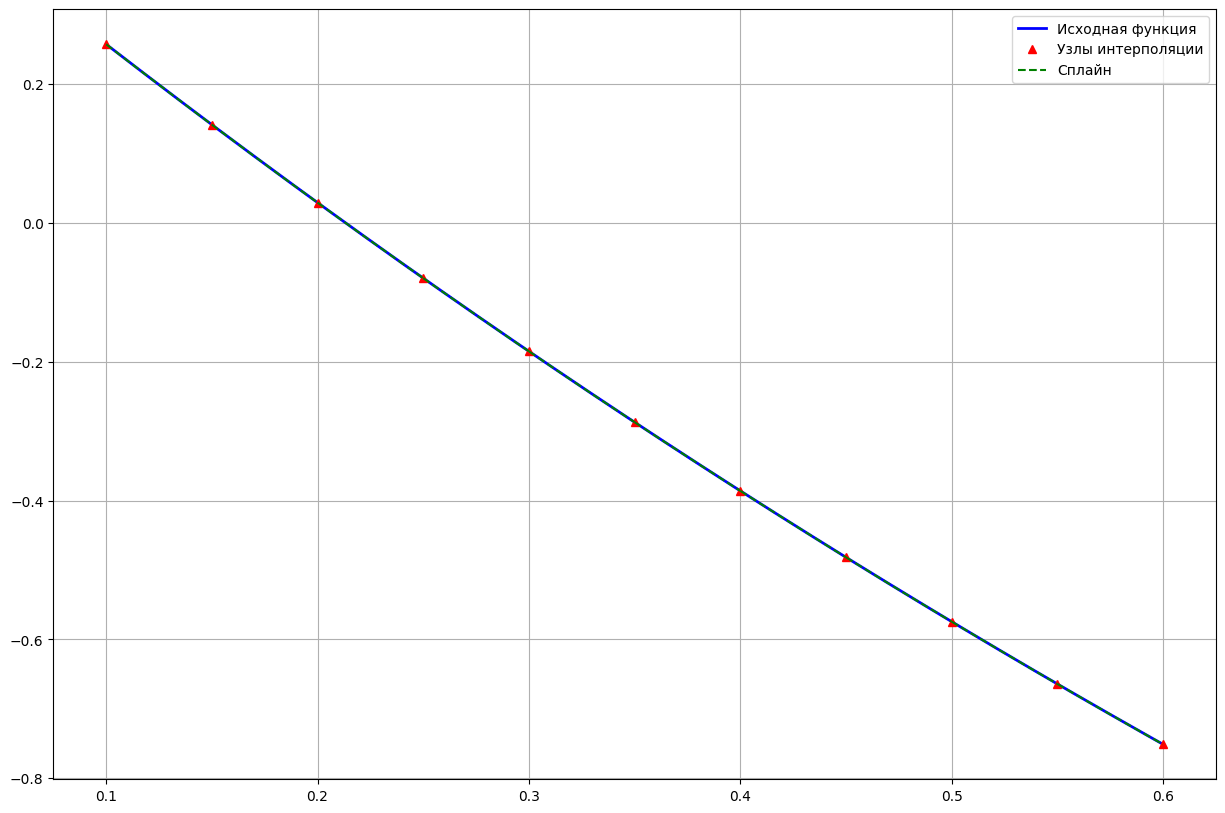

In [14]:
plt.figure(figsize=(15, 10))

plt.plot(x_fine, y_exact, 'b-', label='Исходная функция', linewidth=2)
plt.plot(x_nodes, y_nodes, 'r^', markersize=6, label='Узлы интерполяции')

for i in range(N_segments):
    x_segment = np.linspace(x_nodes[i], x_nodes[i+1], 20)
    x_rel = x_segment - x_nodes[i]  # x - x_i
    spline_func = sp.lambdify(x_sym, spline_funcs[i], 'numpy')
    y_spline = spline_func(x_rel)
    plt.plot(x_segment, y_spline, 'g--', linewidth=1.5, 
             label='Сплайн' if i == 0 else "")
plt.grid(True)

plt.legend()
plt.show()

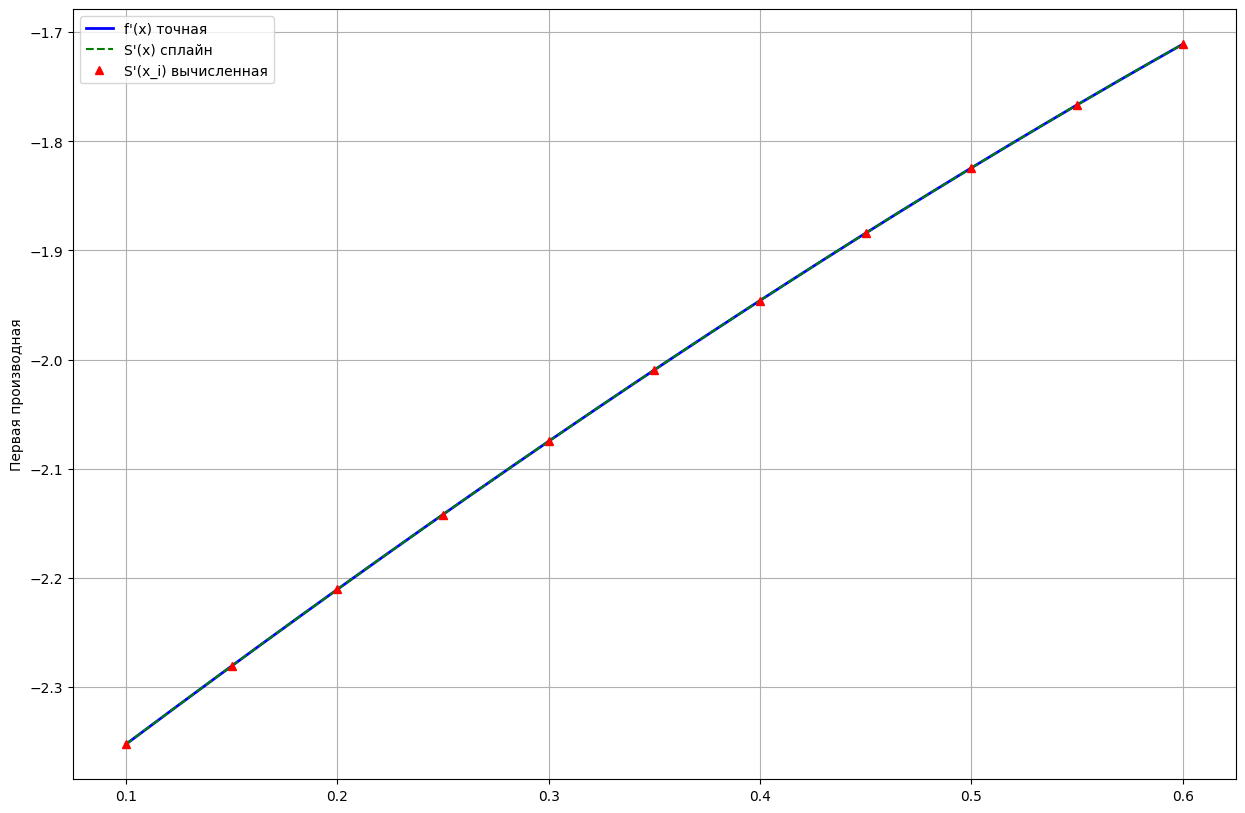

In [15]:
# Производные для проверки
plt.figure(figsize=(15, 10))

plt.plot(x_fine, f_prime(x_fine), 'b-', label="f'(x) точная", linewidth=2)
for i in range(N_segments):
    x_segment = np.linspace(x_nodes[i], x_nodes[i+1], 20)
    x_rel = x_segment - x_nodes[i]  # x - x_i
    spline_func = sp.lambdify(x_sym, sp.diff(spline_funcs[i], x_sym), 'numpy')
    y_spline = spline_func(x_rel)
    plt.plot(x_segment, y_spline, 'g--', linewidth=1.5,
             label="S'(x) сплайн" if i == 0 else "")
plt.plot(x_nodes, k, 'r^', label="S'(x_i) вычисленная")
plt.grid(True)

plt.ylabel("Первая производная")
plt.legend()

plt.show()

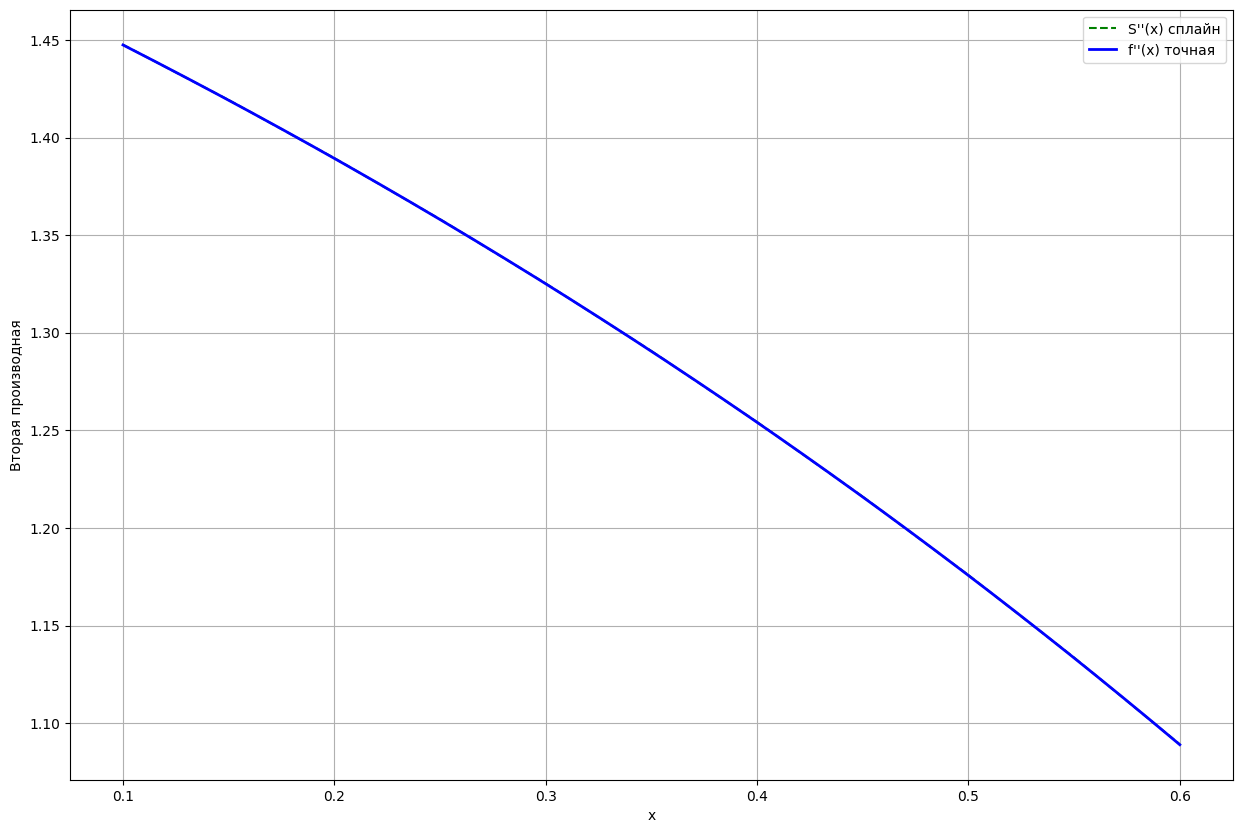

In [16]:
# Вторая производная сплайна (кусочно-линейная)
plt.figure(figsize=(15, 10))

for i in range(N_segments):
    x_segment = np.linspace(x_nodes[i], x_nodes[i+1], 20)
    x_rel = x_segment - x_nodes[i]  # x - x_i
    spline_func = sp.lambdify(x_sym, sp.diff(spline_funcs[i], x_sym, 2), 'numpy')
    y_spline = spline_func(x_rel)
    plt.plot(x_segment, y_spline, 'g--', linewidth=1.5,
             label="S''(x) сплайн" if i == 0 else "")

plt.plot(x_fine, f_double_prime(x_fine), 'b-', label="f''(x) точная", linewidth=2)
plt.grid(True)

plt.ylabel("Вторая производная")
plt.xlabel("x")
plt.legend()

plt.show()

In [17]:
# Оценка ошибки
print("Оценка ошибки интерполяции:")
x_test = np.linspace(A, B, 1000)
max_error = 0
for x_val in x_test:
    # Находим, какому отрезку принадлежит x_val
    idx = np.searchsorted(x_nodes, x_val) - 1
    idx = max(0, min(idx, N_segments-1))
    
    a, b, c, d = coeffs[idx]
    x_rel = x_val - x_nodes[idx]
    y_spline_val = a + b*x_rel + c*x_rel**2 + d*x_rel**3
    error = abs(y_spline_val - f(x_val))
    max_error = max(max_error, error)

print(f"Максимальная ошибка на тестовой сетке: {max_error:.2e}")

Оценка ошибки интерполяции:
Максимальная ошибка на тестовой сетке: 1.47e-08


$a_i = y_i$ \
$b_i = k_i$ \
$c_i = [3(y_{i+1} - y_i)/h_i^2] - [(2k_i + k_{i+1})/h_i]$ \
$d_i = [2(y_i - y_{i+1})/h_i^3] + [(k_i + k_{i+1})/h_i^2]$

кубический сплайн \
$S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3$ \
условия
1) $S_i(x_i) = y_i$
2) $S'_i(x_i) = y'_i$
3) $S_i(x_{i+1}) = y_{i+1}$
4) $S'_i(x_{i+1}) = y'_{i+1}$

---
вывод $(h_i = x-x_i)$
1) $x-x_i=0 \to S_i(x) = a_i + b_i*0 + c_i*0 + d_i*0 = a_i = y(x)$ \
$a_i = y(x)$

2) $x-x_i=0 \to S'_i(x) = b_i + 2*c_i*0 + 3*d_i*0 = b_i = y'(x) = k_i$ \
$b_i = y'(x) = k$

3) $S_{i+1}(x_{i+1}) = y(x) + y'(x)h_i + c_i h_i^2 + d_i h_i^3 = y(x_{i+1})$ \
$c_i h_i^2 + d_i h_i^3 = y(x_{i+1}) - y(x) - y'(x)h_i$

4) $S'_{i+1}(x_{i+1}) = y'(x) + 2c_i h_i + 3d_i h_i^2 = y'(x_{i+1})$ \
$2c_i h_i + 3d_i h_i^2 = y'(x_{i+1}) - y'(x)$

$|h_i^2 \,\,\,\,\,\,\, h_i^3| \,\,\, |c_i| = | y(x_{i+1}) - y(x) - y'(x)h_i |$ \
$|2h_i \,\, 3h_i^2| \,\,\, |d_i| = | y'(x_{i+1}) - y'(x) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,|$

решаем по методу Крамера и получаем

$c_i = [3(y_{i+1} - y_i)/h_i^2] - [(2k_i + k_{i+1})/h_i]$ \
$d_i = [2(y_i - y_{i+1})/h_i^2] + [(k_i + k_{i+1})/h_i^2]$
